<a href="https://colab.research.google.com/github/kutyadog/ai_notebooks/blob/main/Neural_Networks_pyTorch_CJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Neural Network Examples
The following is a gathering of code, tutorials, projects and notes for exploring Neural Networks at their most basic level. This includes image identification, prediction modeling, etc.

# Neural Networks

**Standarization**
Neural Networks train better if data is in the range of -1 ... 1. (its ok if its a bit higher or lower)

`New Value = (old value - Mean) / StandardDeviation`

```
priceMean = df['Price'].mean()
priceStd = df['Price'].std()
df['Price'] = (df['Price']-priceMean)/priceStd
```



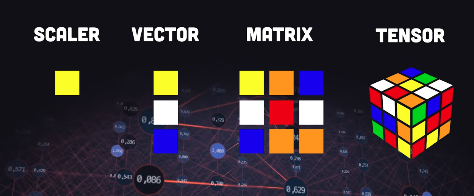

# PyTorch Image identification #1 (numbers set)

Based on youtube tutorial: https://www.youtube.com/watch?v=e5CDe00B3vE

Training on dataset MNIST at: https://www.tensorflow.org/datasets/catalog/mnist


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))])

# two sets of data, one for TRAINING, the other for TESTING
# Dataset is MNIST (https://www.tensorflow.org/datasets/catalog/mnist)
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# pytorch offers concept DataLoaders to access the data efficiently
# two DataLoaders, one for TRAINING, the other for TESTING
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

In [ ]:
print('Number of images in the training dataset:', len(train_set))
print('Number of images in the testing dataset:', len(test_set))

Number of images in the training dataset: 60000
Number of images in the testing dataset: 10000


In [ ]:
print(f"Shape of the images in the training dataset: {train_loader.dataset[0][0].shape}")

Shape of the images in the training dataset: torch.Size([1, 28, 28])


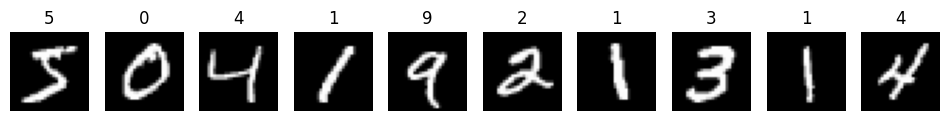

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for i in range(10):
    axes[i].imshow(train_loader.dataset[i][0].squeeze(), cmap='gray')
    axes[i].set_title(train_loader.dataset[i][1])
    axes[i].axis('off')
plt.show()

**Neural** Network

To figure out how we should setup the layers, first we examine the Input Layer.

**Input Layer **

To determine number of input layers, we need to represent each pixel of the images, we get that by looking at the image size (image below)

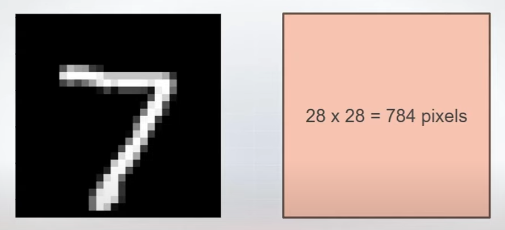

**Output Layer**

If it is a classification problem such as this, you need as many neurons in your output layer as you do classes in your problem

Hidden Layers






1.   Start simple. Try it out, if it works, stick with it.
2.   Consider problem and dataset complexity
3.   If overvfitting, try regularization - instead of lowering layers, try regularization
4.   Try experiments

Check exiting solutions to similar problems




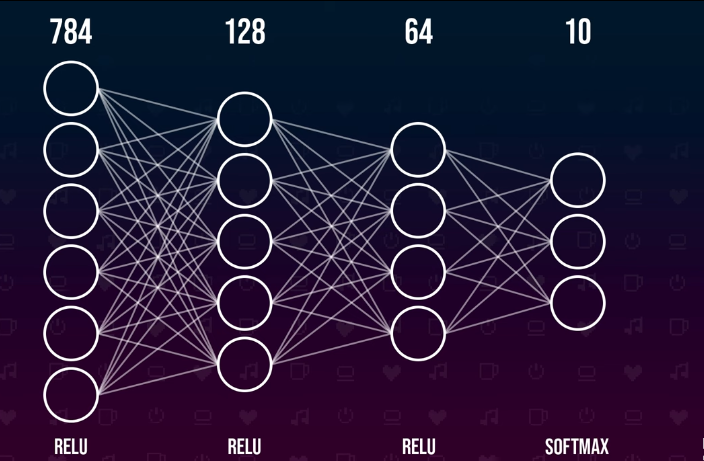

In [ ]:
# nn.Module is widely used and offeres good flexability, there are others

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # ------ first define the layers

        # first 784 input values, outputs 128 activation values
        self.input = nn.Linear(28*28, 128)
        # first hidden layer has 128 input nuerons, and communicates 64 activation values
        self.hidden = nn.Linear(128, 64)
        # output layer takes 64 activations and turns them into 10
        self.output = nn.Linear(64, 10)

    # each nn.Module needs a forward funciton whcih turns input to the network into output... input is x (2-dimensional array size 28x28)
    def forward(self, x):
        # first we flatten 2-d matrix into vector of length 784
        x = x.view(-1, 28*28)
        x = F.relu(self.input(x))
        x = F.relu(self.hidden(x))
        # feed the final 10 activations values into softmax to turn them into probabilities
        x = F.log_softmax(self.output(x), dim=1)
        return x

model = NeuralNetwork()

**BackPropagation**

Next we train the model on the training set.
Comparing the results to make sure its correct.
Everytime something goes wrong, we calculate which Neurons made the bad decision and tweak them a little. Over time the network should get better to recognize the digits.

This training algorithm is called backprobagation. Math on this is hard.

to know if our neural network performs the task correctly, we need a definition of what correct means. That is what a loss function is for.
For a classification task, the negative log likelihood log loss function is great.

40% score on a number (not good), LOG = -0.92
90% (pretty good)                 LOG = -0.10
1%                                LOG -4.60

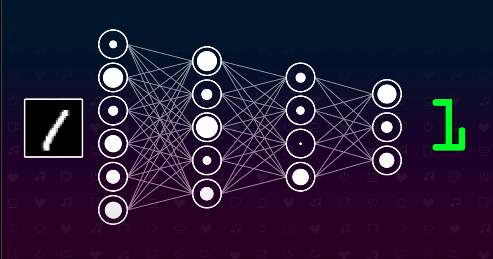

In [ ]:
# our loss function
loss_function = nn.NLLLoss()
# Adam is one of the mplementations of backpropagation
# learning rate sets how quickly model learns
optimizer = optim.Adam(model.parameters(), lr=0.001)

# look over the entire training set 5 times.
epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        # reset the gradients : determine how and which weights are adjusted
        optimizer.zero_grad()

        # use our model to make predictions
        output = model(images)
        # now calculate the loss with our loss function
        loss = loss_function(output, labels)

        # calculate all the gradients for all neurons in our network based on the calculated loss
        loss.backward()
        # we apply this gradient to adjust the weights
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:
def view_classify(image, probabilities):
    probabilities = probabilities.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(image.numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), probabilities)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
# @title test images and see probability

images, _ = next(iter(test_loader))

image = images[0]
with torch.no_grad():
    log_probabilities = model(image)

probabilities = torch.exp(log_probabilities)
view_classify(image.view(1, 28, 28), probabilities)

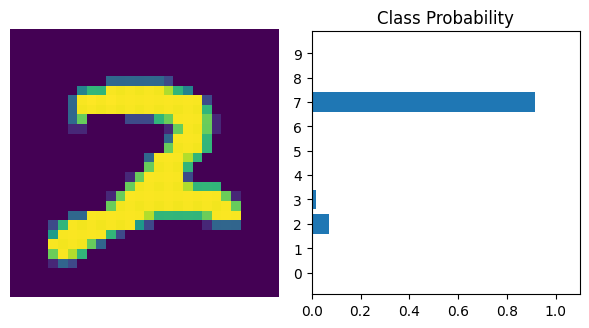

In [ ]:
# now test a random image each time you run it

import random

# get a random index
random_index = random.randint(0, len(test_set)-1)

# get the image and label at that index
image, _ = test_set[random_index]

image = image.unsqueeze(0) # add a batch dimension
with torch.no_grad():
    log_probabilities = model(image)

probabilities = torch.exp(log_probabilities)
view_classify(image.view(1, 28, 28), probabilities)

In [ ]:
# @title Evaluate whole test set

correct = 0
total = 0

with torch.no_grad():
    # iterate over all the images & labels in test set
    for images, labels in test_loader:
        # get prediction for each image
        output = model(images)
        # get the index of the max log-probability
        _, predicted = torch.max(output, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the neural network on the {total} test images: {100 * correct / total}%')

Accuracy of the neural network on the 10000 test images: 96.9%


# Pytorch Image identification with Tensorboard 2

Based on: https://www.youtube.com/watch?v=9SdLOcGnebU&t=201s

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

# test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

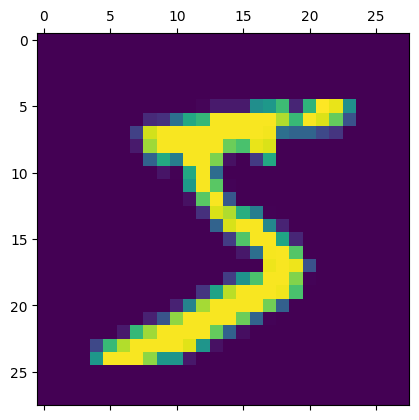

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
# @title Using Flatten layer so that we don't have to call .reshape on input dataset

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# instead of 'adam' could try "SDG'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/

# Predict Mystery Function

GOAL: Build a Neural network that can predict output of mystery function

Lets write a mystery function that does some math.

Next, lets throw random numbers, toss them through the mystery function to get the desired output and see if we can create a model that can learn & predict the mystery function.



In [ ]:
import torch
from torch import nn
import random

In [ ]:
def mystery(a,b):
  return torch.tensor(a+3*b)

In [ ]:
model = nn.Sequential(nn.Linear(2,1))
model

In [ ]:
# @title Train it
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [ ]:
for i in range(1000):
  a = random.random()
  b = random.random()
  desiredOutput = mystery(a,b)

  output = model( torch.tensor([a,b]) )
  loss = criterion(output.squeeze(), desiredOutput)

  if ( i % 100) == 0:
    print(f'Loss: {loss.item()}')

  # update the weights - update nueral networks based on what we learned above.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Loss: 0.007333139888942242
Loss: 0.09281732887029648
Loss: 0.09672069549560547
Loss: 0.00047435861779376864
Loss: 0.002989106113091111
Loss: 0.011148238554596901
Loss: 0.03234861046075821
Loss: 0.003712001722306013
Loss: 9.519521699985489e-05
Loss: 0.00039758055936545134


In [ ]:
# @title Now lets test it

a = 1.0
b = -1.0
output = model( torch.tensor([a,b]) )
print(output)

tensor([-1.7698], grad_fn=<ViewBackward0>)


In [ ]:
mystery(a,b)

tensor(-2.)

# Predict Lemonade Stand Sales

[colab](https://colab.research.google.com/github/LeakyAI/FirstNeuralNet/blob/main/FirstNeuralNetworkSolution%20-%20START%20HERE.ipynb#scrollTo=cjpFWMEDrEj3)
[Explaination & video](https://www.leaky.ai/projectlemonade)

In [ ]:
# @title Prep

# Import PyTorch libraries
import torch
import torch.nn as nn

# Import visualization library
import matplotlib.pyplot as plt

# Verify PyTorch version
torch.__version__


# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

A cpu device was detected.


In [ ]:
# @title Load the data

# Use Pandas to do our dataprocessing on the dataset
# Download the dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/LeakyAI/FirstNeuralNet/main/lemons.csv'
df = pd.read_csv(url)

# Explore the first 10 rows of the dataset
df.head(10)

# Check the size/shape of our dataset
# df.shape

In [ ]:
# @title Standardize the data (every value between -1...1'sh)

# Calculate the mean and standard deviation of price
# Standardize numSold
priceMean = df['Price'].mean()
priceStd = df['Price'].std()
df['Price'] = (df['Price']-priceMean)/priceStd

# Calculate the mean and standard deviation of numSold
# Standardize numSold
numSoldMean = df['NumberSold'].mean()
numSoldStd = df['NumberSold'].std()
df['NumberSold'] = (df['NumberSold']-numSoldMean)/numSoldStd

df.head()

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,0.846650,-0.023669
1,1,1,1,0,1.452587,0.743734
2,0,1,0,0,1.452587,-0.849208
3,1,0,0,1,-0.971158,0.394915
4,1,0,0,1,0.240714,0.080977


In [ ]:
# @title Carve data into 2 parts, the INPUT & the OUTPUT

# Create our PyTorch tensors and move to CPU or GPU if available
# Extract the inputs and create a PyTorch tensor x (inputs)
inputs = ['Weekend','Sunny','Warm','BigSign','Price']
# put inputs into pytorch tensor
x = torch.tensor(df[inputs].values, dtype=torch.float, device=device)

# Extract the outputs and create a PyTorch tensor y (outputs)
outputs = ['NumberSold']
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

# Explore the first 5 inputs
x[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

In [ ]:
# Explore the first 5 outputs
y[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]])

In [ ]:
# @title Build the Neural Network

# Define your PyTorch neural network
# Number of Inputs: 5
# Number of Hidden Units: 100
# Number of Hidden Layers: 1
# Activation Function:  Relu
# Number of Ouputs: 1
model = nn.Sequential(
            nn.Linear(5,100),
            nn.ReLU(), # activation function - ??? will help network be strong in determining non-regularities in the data ?
            nn.Linear(100,1)
        )

# Move it to either the CPU or GPU depending on what we have available
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
# @title train the network

import torch.optim as optim

# criterion = how well its working


# Measure our neural network by mean square error
criterion = torch.nn.MSELoss()

# optimizer = the way the training process wwill update the NN as we progess through the training
#             the methodology of how we actuallyu update the weights.

# Train our network with a simple SGD optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train our network a using the entire dataset 5 times
for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):
       # Single Forward Pass
        ypred = model(x[i]) # ypred is predicted y value

        # Measure how well the model predicted vs the actual value
        loss = criterion(ypred, y[i])

        # Track how well the model predicted (called loss)
        totalLoss+=loss.item()

        # Update the neural network based on everything we just learned
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration
    print ("Total Loss: ", totalLoss)

Total Loss:  123.24794535273799
Total Loss:  8.741086214257962
Total Loss:  4.9194138815963875
Total Loss:  3.931284188722998
Total Loss:  3.1235085449397673


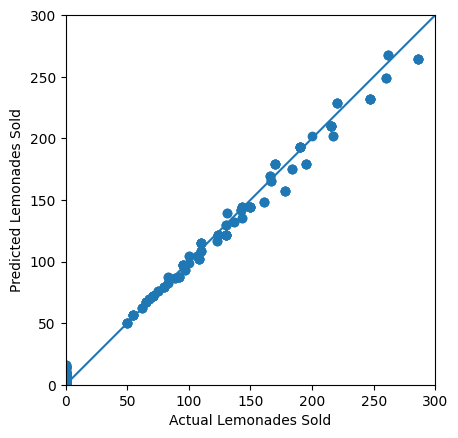

In [ ]:
# @title analyze how well network predicted
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):
    model.eval()                               # Set the model to inference mode

    predictions=[]                             # Track predictions
    actual=[]                                  # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):
        # Single forward pass
        pred = model(x[i])

        # Un-normalize our prediction
        pred = pred*numSoldStd+numSoldMean
        act = y[i]*numSoldStd+numSoldMean

        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Actual Lemonades Sold')
    plt.ylabel('Predicted Lemonades Sold')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

graphPredictions(model, x, y, 0, 300)

In [ ]:
# @title Test Network with your own live data

# Below we use the synthetic data generator formula to
# determine what the actual result should have been.
def datasetGenerator(weekend, sunny, warm, bigsign, price):
    numlemonssold = 0
    if weekend:
        numlemonssold = (sunny*5  + int(500 / price))
        if bigsign:
            numlemonssold = 1.3 * numlemonssold
        if warm:
            numlemonssold = 2 * numlemonssold
        if sunny:
            numlemonssold = 1.25 * numlemonssold
    numlemonssold = int(numlemonssold)

    return numlemonssold

In [ ]:
# Data that affects the number of lemons sold in one day
weekend = 1
sunny = 0
warm = 1
bigsign = 0
price = 7

# Calculate what would have been the actual result using
# the synthetic dataset's algorithm
actual = datasetGenerator(weekend, sunny, warm, bigsign, price)

# Use the CPU as we just need to do a single pass (just to make things simpler) ?
model.to('cpu')

# Normalize our inputs using the same values for our training
price = (price - priceMean) / priceStd

# Create our input tensor
x1 = torch.tensor([weekend, sunny, warm, bigsign, price],dtype=float)

# Pass the input into the neural network
y1 = model(x1.float())

# Un-normalize our output y1
y1 = y1*numSoldStd+numSoldMean

# Compare what your network predicted to the actual
print ("Neural Network Predicts: ", y1.item())
print ("Actual Result: ", actual)

Neural Network Predicts:  142.14537048339844
Actual Result:  142


# Image classification #3 (numberset)
[youtube](https://)

In [ ]:
import torch
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('A {} device was detected.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

# Get data
train = datasets.MNIST(root="data", download=True, train=True, transform=ToTensor())
dataset = DataLoader(train, 32)
#1,28,28 - classes 0-9

# Image Classifier Neural Network
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)),
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64*(28-6)*(28-6), 10)
        )

    def forward(self, x):
        return self.model(x)

# Instance of the neural network, loss, optimizer
clf = ImageClassifier().to(device)
opt = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# Training flow
if __name__ == "__main__":
    for epoch in range(10): # train for 10 epochs
        for batch in dataset:
            X,y = batch
            X, y = X.to(device), y.to(device)
            yhat = clf(X)
            loss = loss_fn(yhat, y)

            # Apply backprop
            opt.zero_grad()
            loss.backward()
            opt.step()

        print(f"Epoch:{epoch} loss is {loss.item()}")

    with open('model_state.pt', 'wb') as f:
        save(clf.state_dict(), f)

    with open('model_state.pt', 'rb') as f:
        clf.load_state_dict(load(f))

    img = Image.open('img_3.jpg')
    img_tensor = ToTensor()(img).unsqueeze(0).to(device)

    print(torch.argmax(clf(img_tensor)))

# Image classification #4 : Playijng cards

[youtube](https://www.youtube.com/watch?v=tHL5STNJKag)
[kaggle](https://www.kaggle.com/code/robikscube/train-your-first-pytorch-model-card-classifier)

DID NOT FINISH

In [ ]:
%%bash
mkdir ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json
kaggle datasets download  gpiosenka/cards-image-datasetclassification

!unzip /content/cards-image-datasetclassification.zip

data_dir = '/content/train'

In [ ]:
!pip install timm
# !pip install opendatasets
# !pip install pandas

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

print('System Version:', sys.version)
print('PyTorch version', torch.__version__)
print('Torchvision version', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

In [ ]:
class PlayingCardDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

    @property
    def classes(self):
        return self.data.classes

In [ ]:
dataset = PlayingCardDataset(
    data_dir=data_dir
)

In [ ]:
len(dataset)

7624

In [ ]:
# dataset[4000]
# (<PIL.Image.Image image mode=RGB size=224x224>, 27)
image, label = dataset[6000]
print(label)
image

In [ ]:
# Get a dictionary associating target values with folder names

target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clu

In [ ]:
# @title Resize all th images to same size to 128x128
#.      and convert it to a pyTorch tensor
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# data_dir = '/kaggle/input/cards-image-datasetclassification/train'
dataset = PlayingCardDataset(data_dir, transform)

In [ ]:
image, label = dataset[100]
image.shape

torch.Size([3, 128, 128])

In [ ]:
# @title wrap dataset in DataLoader - autoparallize reading in each of these images
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
for images, labels in dataloader:
    break

In [ ]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [ ]:
labels

tensor([41, 19, 32, 36,  4, 14, 26, 41, 49, 25, 50, 15,  1, 44, 17, 15, 41,  3,
         6, 45,  3, 27, 49, 41,  1,  8, 34, 18,  5,  9, 29,  7])

In [ ]:
# @title Create Model

class SimpleCardClassifer(nn.Module):
    def __init__(self, num_classes=53):
        super(SimpleCardClassifer, self).__init__()
        # Where we define all the parts of the model
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        # Make a classifier
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )

    def forward(self, x):
        # Connect these parts and return the output
        x = self.features(x)
        output = self.classifier(x)
        return output

In [ ]:
model = SimpleCardClassifer(num_classes=53)
print(str(model)[:500])

In [ ]:
example_out = model(images)
example_out.shape # [batch_size, num_classes]

torch.Size([32, 53])

In [ ]:
# @title train this model

# Loss function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

criterion(example_out, labels)
print(example_out.shape, labels.shape)

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = '/content/train'
valid_folder = '/content/valid'
test_folder = '/content/test'

train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

torch.Size([32, 53]) torch.Size([32])


In [ ]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = SimpleCardClassifer(num_classes=53)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc='Training loop'):
        # Move inputs and labels to the device
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validation loop'):
            # Move inputs and labels to the device
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val_loader.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}, Validation loss: {val_loss}")

# Neural Network Layers

[youtube](https://www.youtube.com/watch?v=FK77zZxaBoI)

Layer Types

Different layers perform different kinds of transformations on their inputs, some are better suited to some tasks than others.

*   Dense / fully connected: Connects each input to each output within its layer
*   Convolutional (image data)
*   Pooling
*   Recurrent (time series data)
*   Normalization
*   Many others

Input
Hidden
Output

Connections between layers :
transfers the output from previous layer as input to the receiving unit
Each connection will have its own assigned weight (number between 0..1). Represents the strngth of connection between the units

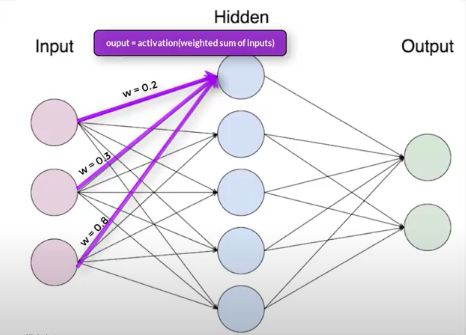

The weighted values are combined and then passed to an activation function that transforms the output to a number between 0..1. That result is then passed on to the next Neuron in the next layer.

Output Layer:
Will have as many units as the categories needed. If we are trying to find out if image is cat or dog or lizard, we will have 3 output layers.

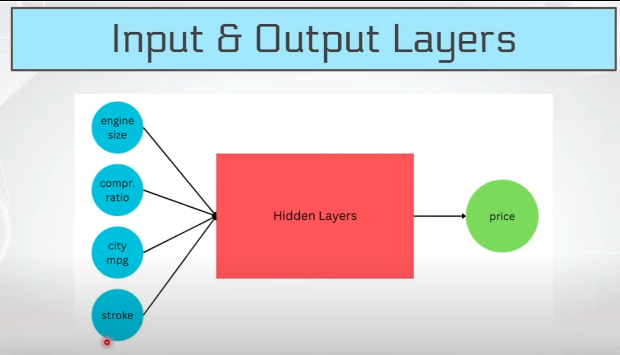

In [ ]:
# Never finished, was old video, code didnt work below this top stuff.

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(5, input_shape=(3,), activation='relu'),
    Dense(2, activation='softmax'),
])

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.image import imread
# # Use matplotlib's imread function instead of the deprecated scipy one.

# %matplotlib inline

# img = np.expand_dims(imread('NN.png'), 0)
# plt.imshow(img[0])